<a href="https://colab.research.google.com/github/akankshaj-8799/Final-Year-Project/blob/main/Additional_Analysis_of_covid_19_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
path = 'https://raw.githubusercontent.com/akankshaj-8799/Final-Year-Project/refs/heads/main/covid_india.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,States,Confirmed,Cured,Death,Active,Lat,Long
0,0,Andaman and Nicobar Islands,33,33,0,0,11.7401,92.6586
1,1,Andhra Pradesh,4510,2620,73,1817,15.9129,79.7400
2,2,Arunachal Pradesh,47,1,0,46,28.2180,94.7278
3,3,Assam,2397,547,4,1846,26.2006,92.9376
4,4,Bihar,4915,2425,30,2460,25.0961,85.3131


In [ ]:
df.head()


,Unnamed: 0,States,Confirmed,Cured,Death,Active,Lat,Long
0,0,Andaman and Nicobar Islands,33,33,0,0,11.7401,92.6586
1,1,Andhra Pradesh,4510,2620,73,1817,15.9129,79.7400
2,2,Arunachal Pradesh,47,1,0,46,28.2180,94.7278
3,3,Assam,2397,547,4,1846,26.2006,92.9376
4,4,Bihar,4915,2425,30,2460,25.0961,85.3131


In [ ]:
###in series form
tot_active = df.groupby('States')['Active'].sum().sort_values(ascending=False)
tot_active.head()

,Active
States,
Maharashtra,42609
Delhi,16229
Tamil Nadu,13506
Gujarat,5057
West Bengal,4236


In [ ]:
###in frame form
tot_active = df.groupby('States')['Active'].sum().sort_values(ascending=False).to_frame()
tot_active.head()

,Active
States,
Maharashtra,42609
Delhi,16229
Tamil Nadu,13506
Gujarat,5057
West Bengal,4236


In [ ]:
tot_active.style.background_gradient(cmap='PRGn')

,Active
States,
Maharashtra,42609
Delhi,16229
Tamil Nadu,13506
Gujarat,5057
West Bengal,4236
Uttar Pradesh,3828
Karnataka,3186
Madhya Pradesh,2721
Rajasthan,2599


In [ ]:
### Total vs Cured Plot
df.head()

,Unnamed: 0,States,Confirmed,Cured,Death,Active,Lat,Long
0,0,Andaman and Nicobar Islands,33,33,0,0,11.7401,92.6586
1,1,Andhra Pradesh,4510,2620,73,1817,15.9129,79.7400
2,2,Arunachal Pradesh,47,1,0,46,28.2180,94.7278
3,3,Assam,2397,547,4,1846,26.2006,92.9376
4,4,Bihar,4915,2425,30,2460,25.0961,85.3131


In [ ]:
#renaming the column name
df.rename(columns ={"States":"state","Confirmed":"confirmed","Cured":"recovered","Active":"active","Death":"deaths"},inplace=True)
df.head()

,Unnamed: 0,state,confirmed,recovered,deaths,active,Lat,Long
0,0,Andaman and Nicobar Islands,33,33,0,0,11.7401,92.6586
1,1,Andhra Pradesh,4510,2620,73,1817,15.9129,79.7400
2,2,Arunachal Pradesh,47,1,0,46,28.2180,94.7278
3,3,Assam,2397,547,4,1846,26.2006,92.9376
4,4,Bihar,4915,2425,30,2460,25.0961,85.3131


In [ ]:
data = df[['state','confirmed','active','deaths','recovered']]
data.head()

,state,confirmed,active,deaths,recovered
0,Andaman and Nicobar Islands,33,0,0,33
1,Andhra Pradesh,4510,1817,73,2620
2,Arunachal Pradesh,47,46,0,1
3,Assam,2397,1846,4,547
4,Bihar,4915,2460,30,2425


In [ ]:
data.sort_values('confirmed',ascending=False,inplace=True)
data.head(20)

<ipython-input-17-573448e55dd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('confirmed',ascending=False,inplace=True)


,state,confirmed,active,deaths,recovered
19,Maharashtra,82968,42609,2969,37390
29,Tamil Nadu,30152,13506,251,16395
8,Delhi,27654,16229,761,10664
10,Gujarat,19592,5057,1219,13316
27,Rajasthan,10331,2599,231,7501
33,Uttar Pradesh,9733,3828,257,5648
18,Madhya Pradesh,9228,2721,399,6108
34,West Bengal,7738,4236,383,3119
15,Karnataka,5213,3186,59,1968
4,Bihar,4915,2460,30,2425


In [ ]:
import folium
import numpy as np
# declaration of map
india_map = folium.Map(location=[9,80], zoom_start= 4, max_zoom=5, height= 1000, width='100%') # Changed US_map to india_map

for i in range(0, len(df[df['confirmed']>0].index)):
    folium.Circle(
        location=[df.iloc[i]['Lat'], df.iloc[i]['Long']],
        radius=(int(np.log2(df.iloc[i]['confirmed']+1.0001)))*15000,
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df.iloc[i].state+"</h5>"+
        "<li>Confirmed: "+str(df.iloc[i]['confirmed'])+"</li>"+
        "<li>Active:   "+str(df.iloc[i]['active'])+"</li>"+
        "<li>Recovered:   "+str(df.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:   "+str(df.iloc[i]['deaths'])+"</li>"+
        "</ul>",
        fill=True).add_to(india_map)
india_map

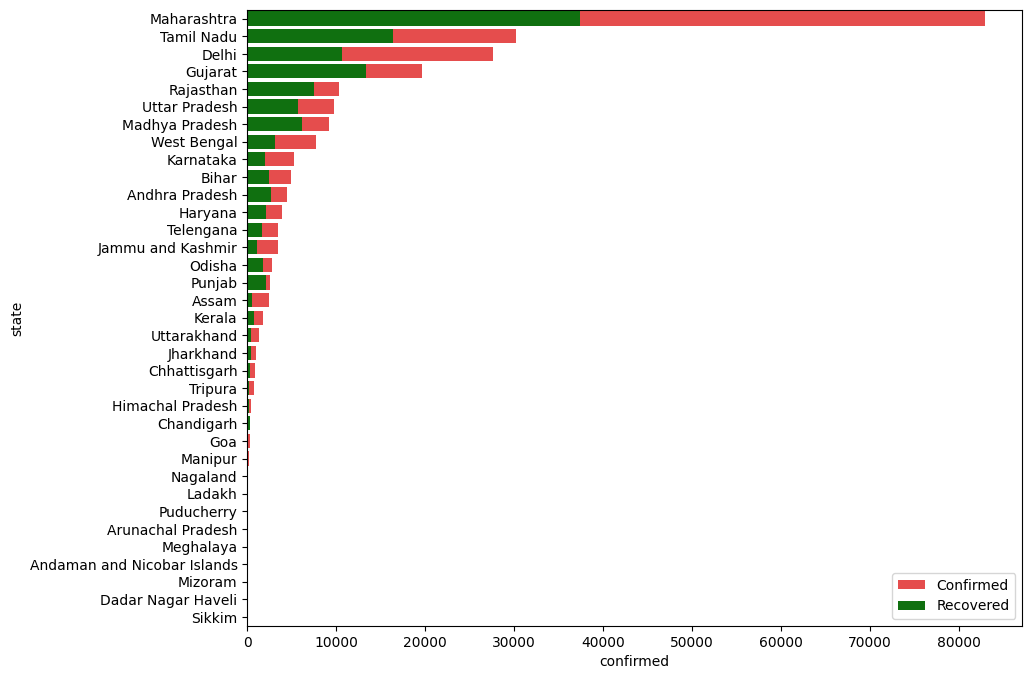

In [ ]:
### plot confirmed vs cured
import seaborn as sns # Make sure seaborn is imported
import matplotlib.pyplot as plt # Make sure matplotlib is imported

plt.figure(figsize=(10,8))
# Use the 'x' and 'y' keywords to specify the columns for the barplot
# Use the 'data' keyword to specify the DataFrame
sns.barplot(x='confirmed', y='state', data=data, color='red', label='Confirmed', alpha=0.8)
sns.barplot(x='recovered', y='state', data=data, color='green', label='Recovered')
plt.legend(loc=4)
plt.show()